In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("AirPassengers.csv")

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data['Month'] = pd.to_datetime(data.Month)

In [5]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
data.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [7]:
data = data.set_index(data.Month)
data.drop('Month', axis = 1, inplace = True)
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [8]:
ts = data['#Passengers']

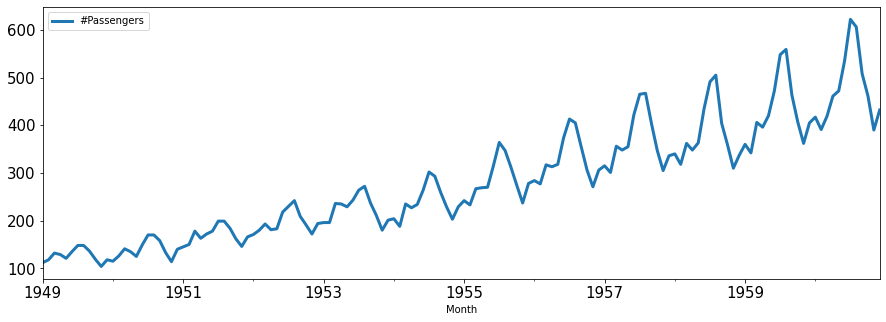

In [9]:
data.plot(figsize=(15,5), linewidth=3, fontsize=15)
plt.plot(data)

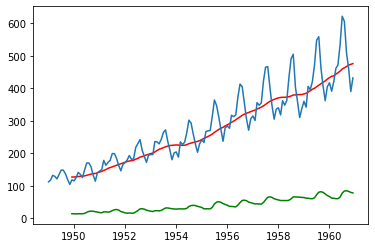

In [11]:
rolmean = data.rolling(window = 12).mean()
rolstd = data.rolling(window=12).std()
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd,color='green')
plt.plot(data)

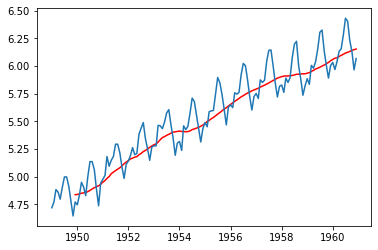

In [13]:
data_log = np.log(data)
rolmean_data_log = data_log.rolling(window = 12).mean()
plt.plot(rolmean_data_log, color = 'red', label = 'Rolling Mean')
plt.plot(data_log)

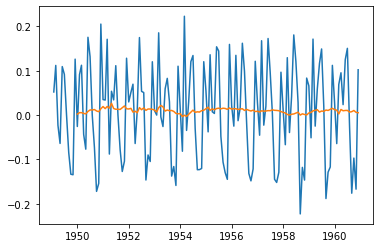

In [14]:
data_log_diff = data_log - data_log.shift()
plt.plot(data_log_diff)
data_log_diff.dropna(inplace = True)
plt.plot(data_log_diff.rolling(window = 12).mean())

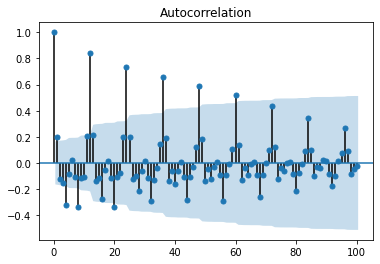

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_log_diff, lags = 100)
plt.show()

c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


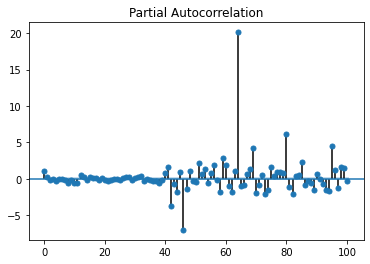

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_log_diff, lags = 100)
plt.show()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 1.5023')

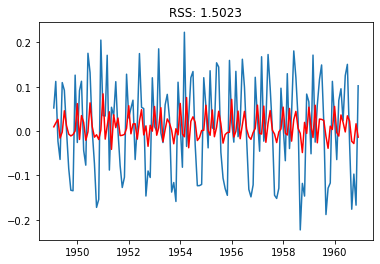

In [18]:
# AR MODEL
model = ARIMA(data_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-data_log_diff["#Passengers"])**2))

c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting AR model


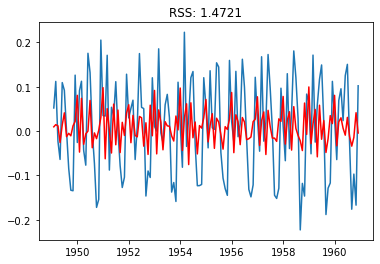

In [21]:
#MA MODEL
model = ARIMA(data_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(data_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-data_log_diff["#Passengers"])**2))
print('Plotting AR model')

c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dell 7470 2k\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: 0.9832')

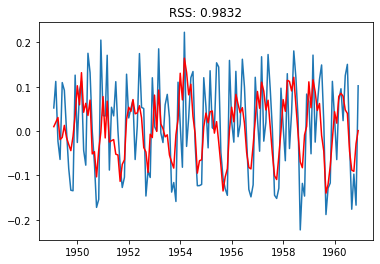

In [29]:
model = ARIMA(data_log, order=(3,1,3))
results_ARIMA = model.fit(disp=-1)
plt.plot(data_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-data_log_diff["#Passengers"])**2))

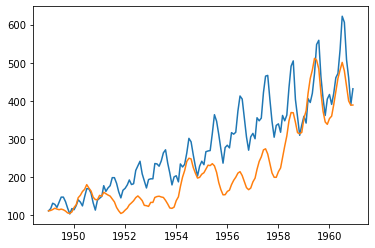

In [30]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(data_log['#Passengers'].iloc[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data)
plt.plot(predictions_ARIMA)

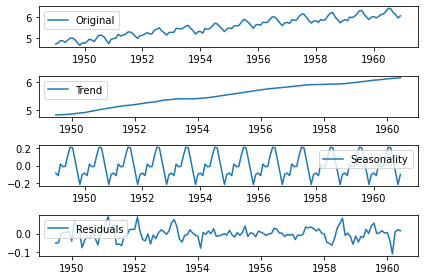

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()